In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import xgboost as xgb

In [ ]:
df = pd.read_csv('/content/sample_data/heart.csv')
#print first 10 rows
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [ ]:
healthy = df[(df['target'] ==0) ].count()[1]
sick = df[(df['target'] ==1) ].count()[1]
print ("num of people without heart deacise: "+ str(healthy))
print ("num of people with chance for heart deacise: "+ str(sick))

num of pepole without heart deacise: 499
num of pepole with chance for heart deacise: 526


In [ ]:
X = df.iloc[:,0:13].values
y = df.iloc[:,13].values
#nurmalize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[0:13])
# # add non-feature target column to dataframe
dfNorm['target'] = df['target']
dfNorm.head(10)

X = dfNorm.iloc[:,0:13].values
y = dfNorm.iloc[:,13].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((768, 13), (768,), (257, 13), (257,))

In [ ]:
results_test = {}
results_train = {}
list_algos=[]

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[117   6]
 [  1 133]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       123
           1       0.96      0.99      0.97       134

    accuracy                           0.97       257
   macro avg       0.97      0.97      0.97       257
weighted avg       0.97      0.97      0.97       257



In [ ]:
### helping function

def conf(algo_name,X_test, y_test):
    y_pred = algo_name.predict(X_test)
    forest_cm = metrics.confusion_matrix(y_pred, y_test)
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name)[0:str(algo_name).find('(')])

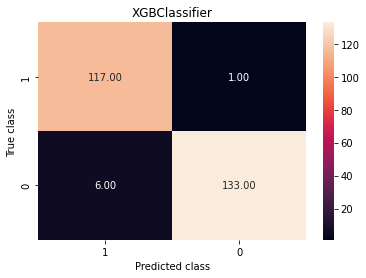

In [ ]:
conf(xgb_model,X_test, y_test)